# Selecting features for model performance


## Building a diabetes classifier
You'll be using the Pima Indians diabetes dataset to predict whether a person has diabetes using logistic regression. There are 8 features and one target in this dataset. The data has been split into a training and test set and pre-loaded for you as X_train, y_train, X_test, and y_test.

A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.

### init: 2 dataframes, 2 series. StandardScaler, LogisticRegression, accuracy_score

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_train, X_test, y_train,  y_test)
tobedownloaded="{pandas.core.frame.DataFrame: {'X_test.csv': 'https://file.io/tq6kXJ',\
  'X_train.csv': 'https://file.io/eZrT1P'},\
 pandas.core.series.Series: {'y_test.csv': 'https://file.io/PqPwdN',\
  'y_train.csv': 'https://file.io/hbIApx'}}"
prefix='data_from_datacamp/Chap3-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"X_test.csv": "https://file.io/tq6kXJ",  "X_train.csv": "https://file.io/eZrT1P"}, pandas.core.series.Series: {"y_test.csv": "https://file.io/PqPwdN",  "y_train.csv": "https://file.io/hbIApx"}}
{'pandas.core.frame.DataFrame': {'X_test.csv': 'https://file.io/tq6kXJ', 'X_train.csv': 'https://file.io/eZrT1P'}, 'pandas.core.series.Series': {'y_test.csv': 'https://file.io/PqPwdN', 'y_train.csv': 'https://file.io/hbIApx'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3634    0  3634    0     0   4352      0 --:--:-- --:--:-- --:--:--  4357
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  

In [2]:
import pandas as pd
X_train=pd.read_csv(prefix+'X_train.csv',index_col=0)
X_test=pd.read_csv(prefix+'X_test.csv',index_col=0)
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)
y_test=pd.read_csv(prefix+'y_test.csv',index_col=0, header=None,squeeze=True)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
lr = LogisticRegression(solver='liblinear')

### code

- Fit the scaler on the training features and transform these features in one go.
- Fit the logistic regression model on the scaled training data.
- Scale the test features.
- Predict diabetes presence on the scaled test set.

In [9]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X_train.columns, abs(lr.coef_[0]).round(2))))

79.6% accuracy on test set.
{'pregnant': 0.04, 'glucose': 1.23, 'diastolic': 0.03, 'triceps': 0.24, 'insulin': 0.19, 'bmi': 0.38, 'family': 0.34, 'age': 0.34}


## Manual Recursive Feature Elimination
Now that we've created a diabetes classifier, let's see if we can reduce the number of features without hurting the model accuracy too much.

On the second line of code the features are selected from the original dataframe. Adjust this selection.

A StandardScaler() instance has been predefined as scaler and a LogisticRegression() one as lr.

All necessary functions and packages have been pre-loaded too.

### init: 1 dataframe, 1 serie, StandardScaler, LogisticRegression, accuracy_score, train_test_split

In [10]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(diabetes_df, y)
tobedownloaded="{pandas.core.frame.DataFrame: {'diabetes_df.csv': 'https://file.io/xITp62'},\
 pandas.core.series.Series: {'y.csv': 'https://file.io/BhxtlA'}}"
prefix='data_from_datacamp/Chap3-Exercise1.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"diabetes_df.csv": "https://file.io/xITp62"}, pandas.core.series.Series: {"y.csv": "https://file.io/BhxtlA"}}
{'pandas.core.frame.DataFrame': {'diabetes_df.csv': 'https://file.io/xITp62'}, 'pandas.core.series.Series': {'y.csv': 'https://file.io/BhxtlA'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17996    0 17996    0     0  28340      0 --:--:-- --:--:-- --:--:-- 28384
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4986    0  4986    0     0   7332      0 --:--:-- --:--:-- --:--:--  7353


In [11]:
import pandas as pd
diabetes_df=pd.read_csv(prefix+'diabetes_df.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
lr = LogisticRegression(solver='liblinear')

### code

In [15]:
# Remove the feature with the lowest model coefficient
X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

80.6% accuracy on test set.
{'pregnant': 0.05, 'glucose': 1.23, 'triceps': 0.24, 'insulin': 0.2, 'bmi': 0.39, 'family': 0.34, 'age': 0.35}


Run the code and remove 2 more features with the lowest model coefficients.


In [16]:
# Remove the 2 features with the lowest model coefficients
X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

78.6% accuracy on test set.
{'glucose': 1.23, 'triceps': 0.46, 'insulin': 0.13, 'family': 0.34, 'age': 0.32}


Run the code and only keep the feature with the highest coefficient.


In [17]:
# Only keep the feature with the highest coefficient
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model to the data
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.5% accuracy on test set.
{'glucose': 1.27}


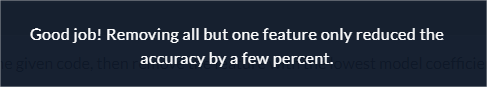

## Automatic Recursive Feature Elimination
Now let's automate this recursive process. Wrap a Recursive Feature Eliminator (RFE) around our logistic regression estimator and pass it the desired number of features.

All the necessary functions and packages have been pre-loaded and the features have been scaled for you.

### init: 1 dataframe, 2 arrays, 2 series, RFE

In [38]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, X_train, X_test, y_train,  y_test)
tobedownloaded="{pandas.core.series.Series: {'y_test.csv': 'https://file.io/oBEL2Z',\
  'y_train.csv': 'https://file.io/VnqxKP'},\
 numpy.ndarray: {'X_test.csv': 'https://file.io/ITvoQI',\
  'X_train.csv': 'https://file.io/fC4xo6'},\
 pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/srkgXu'}}"
prefix='data_from_datacamp/Chap3-Exercise1.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.series.Series: {"y_test.csv": "https://file.io/oBEL2Z",  "y_train.csv": "https://file.io/VnqxKP"}, numpy.ndarray: {"X_test.csv": "https://file.io/ITvoQI",  "X_train.csv": "https://file.io/fC4xo6"}, pandas.core.frame.DataFrame: {"X.csv": "https://file.io/srkgXu"}}
{'pandas.core.series.Series': {'y_test.csv': 'https://file.io/oBEL2Z', 'y_train.csv': 'https://file.io/VnqxKP'}, 'numpy.ndarray': {'X_test.csv': 'https://file.io/ITvoQI', 'X_train.csv': 'https://file.io/fC4xo6'}, 'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/srkgXu'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1243    0  1243    0     0   1942      0 --:--:-- --:--:-- --:--:--  1945
  % Total    % Received % Xferd  Average Speed

In [39]:
from uploadfromdatacamp import loadNDArrayFromCsv
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)
X_train=loadNDArrayFromCsv(prefix+'X_train.csv')
X_test=loadNDArrayFromCsv(prefix+'X_test.csv')
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)
y_test=pd.read_csv(prefix+'y_test.csv',index_col=0, header=None,squeeze=True)

In [40]:
from sklearn.feature_selection import RFE

### code

In [41]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 5, 'glucose': 1, 'diastolic': 6, 'triceps': 3, 'insulin': 4, 'bmi': 1, 'family': 2, 'age': 1}
Index(['glucose', 'bmi', 'age'], dtype='object')
80.6% accuracy on test set.


# Tree-based feature selection



## Building a random forest model
You'll again work on the Pima Indians dataset to predict whether an individual has diabetes. This time using a random forest classifier. You'll fit the model on the training data after performing the train-test split and consult the feature importance values.

The feature and target datasets have been pre-loaded for you as X and y. Same goes for the necessary packages and functions.

### init: 1 dataframe, 1 serie, train_test_split, RandomForestClassifier, accuracy_score

In [48]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, y)
tobedownloaded="{pandas.core.series.Series: {'y.csv': 'https://file.io/jvycGa'},\
 pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/UX19Mf'}}"
prefix='data_from_datacamp/Chap3-Exercise2.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

In [49]:
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### code

In [52]:
# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0, n_estimators=10)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


## Random forest for feature selection
Now lets use the fitted random model to select the most important features from our input dataset X.

The trained model from the previous exercise has been pre-loaded for you as rf.

### code

Create a mask for features with an importance higher than 0.15.


In [53]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Prints out the mask
print(mask)

[False  True False False False False False  True]


Sub-select the most important features by applying the mask to X.


In [54]:
# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'age'], dtype='object')


## Recursive Feature Elimination with random forests
You'll wrap a Recursive Feature Eliminator around a random forest model to remove features step by step. This method is more conservative compared to selecting features after applying a single importance threshold. Since dropping one feature can influence the relative importances of the others.

You'll need these pre-loaded datasets: X, X_train, y_train.

Functions and classes that have been pre-loaded for you are: RandomForestClassifier(), RFE(), train_test_split().

### init: 2 dataframes, 1 serie, RandomForestClassifier(), RFE(), train_test_split().

In [55]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, X_train, y_train)
tobedownloaded="{pandas.core.series.Series: {'y_train.csv': 'https://file.io/KODfLK'},\
 pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/qWB9VT',\
  'X_train.csv': 'https://file.io/w3lgqy'}}"
prefix='data_from_datacamp/Chap3-Exercise2.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.series.Series: {"y_train.csv": "https://file.io/KODfLK"}, pandas.core.frame.DataFrame: {"X.csv": "https://file.io/qWB9VT",  "X_train.csv": "https://file.io/w3lgqy"}}
{'pandas.core.series.Series': {'y_train.csv': 'https://file.io/KODfLK'}, 'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/qWB9VT', 'X_train.csv': 'https://file.io/w3lgqy'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3743    0  3743    0     0   3776      0 --:--:-- --:--:-- --:--:--  3780
100  3743    0  3743    0     0   3776      0 --:--:-- --:--:-- --:--:--  3780
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  

In [56]:
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)
X_train=pd.read_csv(prefix+'X_train.csv',index_col=0)
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

### code


Create a recursive feature eliminator that will select the 2 most important features using a random forest model.

In [61]:
# Wrap the feature eliminator around the random forest model
rfe = RFE(estimator=RandomForestClassifier(n_estimators=10), n_features_to_select=2, verbose=1)

Fit the recursive feature eliminator to the training data.


In [62]:
# Fit the model to the training data
rfe.fit(X_train, y_train)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=2, step=1, verbose=1)

Create a mask using the fitted eliminator and apply it to the feature dataset X.


In [63]:
rfe.support_

array([False,  True, False, False,  True, False, False, False])

In [64]:
# Create a mask using an attribute of rfe
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Index(['glucose', 'insulin'], dtype='object')


Change the settings of RFE() to eliminate 2 features at each step.


In [67]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators=10), step=2,  n_features_to_select=2, verbose=1)
# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


# Regularized linear regression


## Creating a LASSO regressor
You'll be working on the numeric ANSUR body measurements dataset to predict a persons Body Mass Index (BMI) using the pre-imported Lasso() regressor. BMI is a metric derived from body height and weight but those two features have been removed from the dataset to give the model a challenge.

You'll standardize the data first using the StandardScaler() that has been instantiated for you as scaler to make sure all coefficients face a comparable regularizing force trying to bring them down.

All necessary functions and classes plus the input datasets X and y have been pre-loaded.

### init: 1 dataframe, 1 serie, StandardScaler, train_test_split, Lasso

In [68]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X, y)
tobedownloaded="{pandas.core.series.Series: {'y.csv': 'https://file.io/S86kdQ'},\
 pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/KFqgbf'}}"
prefix='data_from_datacamp/Chap3-Exercise3.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.series.Series: {"y.csv": "https://file.io/S86kdQ"}, pandas.core.frame.DataFrame: {"X.csv": "https://file.io/KFqgbf"}}
{'pandas.core.series.Series': {'y.csv': 'https://file.io/S86kdQ'}, 'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/KFqgbf'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 94571    0 94571    0     0   135k      0 --:--:-- --:--:-- --:--:--  136k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  220k    0  220k    0     0   220k      0 --:--:-- --:--:-- --:--:--  221k
100 1499k    0 1499k    0     0   892k      0 --:--:--  0:00:01 --:--:--  892k


In [69]:
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
scaler = StandardScaler()


### code

In [71]:
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Lasso model results
Now that you've trained the Lasso model, you'll score its predictive capacity (R2) on the test set and count how many features are ignored because their coefficient is reduced to zero.

The X_test and y_test datasets have been pre-loaded for you.

The Lasso() model and StandardScaler() have been instantiated as la and scaler respectively and both were fitted to the training data.

### code

In [72]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 84.7% of the variance in the test set.
The model has ignored 82 out of 91 features.


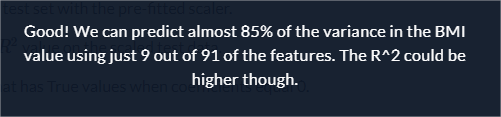

## Adjusting the regularization strength
Your current Lasso model has an R2 score of 84.7%. When a model applies overly powerful regularization it can suffer from high bias, hurting its predictive power.

Let's improve the balance between predictive power and model simplicity by tweaking the alpha parameter.

Find the highest value for alpha that keeps the R2 value above 98% from the options: 1, 0.5, 0.1, and 0.01.

In [75]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 84.7% of the variance in the test set.
82 out of 91 features were ignored.


In [76]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.5, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 93.8% of the variance in the test set.
79 out of 91 features were ignored.


In [77]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.3% of the variance in the test set.
64 out of 91 features were ignored.


In [78]:
# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.01, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.8% of the variance in the test set.
37 out of 91 features were ignored.


# Combining feature selectors


## Creating a LassoCV regressor
You'll be predicting biceps circumference on a subsample of the male ANSUR dataset using the LassoCV() regressor that automatically tunes the regularization strength (alpha value) using Cross-Validation.

The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.

### init: 2 arrays, 2 series

In [79]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_train, X_test, y_train,  y_test)
tobedownloaded="{pandas.core.series.Series: {'y_test.csv': 'https://file.io/PyrHun',\
  'y_train.csv': 'https://file.io/u5qRnN'},\
 numpy.ndarray: {'X_test.csv': 'https://file.io/5DqONB',\
  'X_train.csv': 'https://file.io/ANkTev'}}"
prefix='data_from_datacamp/Chap3-Exercise4.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.series.Series: {"y_test.csv": "https://file.io/PyrHun",  "y_train.csv": "https://file.io/u5qRnN"}, numpy.ndarray: {"X_test.csv": "https://file.io/5DqONB",  "X_train.csv": "https://file.io/ANkTev"}}
{'pandas.core.series.Series': {'y_test.csv': 'https://file.io/PyrHun', 'y_train.csv': 'https://file.io/u5qRnN'}, 'numpy.ndarray': {'X_test.csv': 'https://file.io/5DqONB', 'X_train.csv': 'https://file.io/ANkTev'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2369    0  2369    0     0   3013      0 --:--:-- --:--:-- --:--:--  3021
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5521    0  5521 

In [81]:
from uploadfromdatacamp import loadNDArrayFromCsv
import pandas as pd
X_train=loadNDArrayFromCsv(prefix+'X_train.csv')
X_test=loadNDArrayFromCsv(prefix+'X_test.csv')
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)
y_test=pd.read_csv(prefix+'y_test.csv',index_col=0, header=None,squeeze=True)

### code

In [82]:
from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ !=0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 0.089
The model explains 88.2% of the test set variance
26 features out of 32 selected


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## Ensemble models for extra votes
The LassoCV() model selected 26 out of 32 features. Not bad, but not a spectacular dimensionality reduction either. Let's use two more models to select the 10 features they consider most important using the Recursive Feature Eliminator (RFE).

The standardized training and test data has been pre-loaded for you as X_train, X_test, y_train, and y_test.

### init: 2 arrays, 2 series

In [83]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_train, X_test, y_train,  y_test)
tobedownloaded="{pandas.core.series.Series: {'y_test.csv': 'https://file.io/23FcC4',\
  'y_train.csv': 'https://file.io/StM70h'},\
 numpy.ndarray: {'X_test.csv': 'https://file.io/WjDJPj',\
  'X_train.csv': 'https://file.io/Mxd8Ob'}}"
prefix='data_from_datacamp/Chap3-Exercise4.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.series.Series: {"y_test.csv": "https://file.io/23FcC4",  "y_train.csv": "https://file.io/StM70h"}, numpy.ndarray: {"X_test.csv": "https://file.io/WjDJPj",  "X_train.csv": "https://file.io/Mxd8Ob"}}
{'pandas.core.series.Series': {'y_test.csv': 'https://file.io/23FcC4', 'y_train.csv': 'https://file.io/StM70h'}, 'numpy.ndarray': {'X_test.csv': 'https://file.io/WjDJPj', 'X_train.csv': 'https://file.io/Mxd8Ob'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2369    0  2369    0     0   4008      0 --:--:-- --:--:-- --:--:--  4008
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0 

In [84]:
from uploadfromdatacamp import loadNDArrayFromCsv
import pandas as pd
X_train=loadNDArrayFromCsv(prefix+'X_train.csv')
X_test=loadNDArrayFromCsv(prefix+'X_test.csv')
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)
y_test=pd.read_csv(prefix+'y_test.csv',index_col=0, header=None,squeeze=True)

### code

Select 10 features with RFE on a GradientBoostingRegressor and drop 3 features on each step.

In [85]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.


RFE(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                        init=None, learning_rate=0.1, loss='ls',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_iter_no_change=None,
                                        presort='auto', random_state=None,
                                        subsample=1.0, tol=0.0001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
    n_features_to_select=10, step=3, verbose=1)

Calculate the R2 on the test set.

In [87]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 85.6% of the variance in the test set


Assign the support array of the fitted model to gb_mask.


In [88]:
# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

Modify the first step to select 10 features with RFE on a RandomForestRegressor() and drop 3 features on each step.

In [89]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 26 features.
Fitting estimator with 23 features.


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 20 features.
Fitting estimator with 17 features.


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 14 features.
Fitting estimator with 11 features.


C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\F279814\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model can explain 83.0% of the variance in the test set


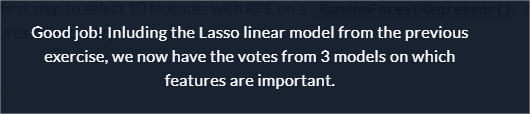

## Combining 3 feature selectors
We'll combine the votes of the 3 models you built in the previous exercises, to decide which features are important into a meta mask. We'll then use this mask to reduce dimensionality and see how a simple linear regressor performs on the reduced dataset.

The per model votes have been pre-loaded as lcv_mask, rf_mask, and gb_mask and the feature and target datasets as X and y.

### init: concatenate 2 arrays, 1 dataframe, 1 serie

In [99]:
X=pd.DataFrame(np.concatenate((X_train, X_test)))

In [108]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X,y)
tobedownloaded="{pandas.core.frame.DataFrame: {'X.csv': 'https://file.io/at6GpI'},\
 pandas.core.series.Series: {'y.csv': 'https://file.io/nZeiRi'}}"
prefix='data_from_datacamp/Chap3-Exercise4.3_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"X.csv": "https://file.io/at6GpI"}, pandas.core.series.Series: {"y.csv": "https://file.io/nZeiRi"}}
{'pandas.core.frame.DataFrame': {'X.csv': 'https://file.io/at6GpI'}, 'pandas.core.series.Series': {'y.csv': 'https://file.io/nZeiRi'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  148k    0  148k    0     0   150k      0 --:--:-- --:--:-- --:--:--  150k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7890    0  7890 

In [109]:
import pandas as pd
X=pd.read_csv(prefix+'X.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)

In [111]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

### code

Sum the votes of the three models using np.sum().


In [100]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

[1 0 3 3 0 1 0 3 1 1 1 3 1 1 1 2 0 1 1 2 0 1 3 1 0 3 1 2 3 1 2 3]


Create a mask for features selected by all 3 models.


In [101]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes  == 3
print(meta_mask)

[False False  True  True False False False  True False False False  True
 False False False False False False False False False False  True False
 False  True False False  True False False  True]


Apply the dimensionality reduction on X and print which features were selected.


In [105]:
# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print(X_reduced.columns)

Index(['bideltoidbreadth', 'buttockcircumference', 'chestcircumference',
       'forearmcircumferenceflexed', 'shouldercircumference',
       'thighcircumference', 'waistcircumference', 'BMI'],
      dtype='object')


Plug the reduced dataset into the code for simple linear regression that has been written for you.

In [112]:
# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 87.1% of the variance in the test set using 8 features.


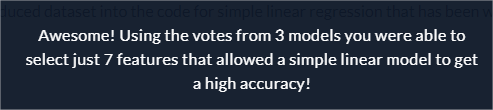